# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Data Preparation

In [2]:
df = pd.read_excel('Titanic+Data.xls')

In [3]:
df.rename(columns={"Passenger Class":"Pclass", "No of Siblings or Spouses on Board":"SibSp",
                   "No of Parents or Children on Board": "Parch", "Ticket Number":"Ticket",
                   "Passenger Fare":"Fare", "Port of Embarkation":"Embarked"}, inplace=True)

In [4]:
df.duplicated().any()

False

In [5]:
df.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           263
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2
Life Boat     823
dtype: int64

In [6]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]
missing_data(df) 

,columns,Total,%
4,Age,263,20.091673
8,Fare,1,0.076394
9,Cabin,1014,77.463713
10,Embarked,2,0.152788
11,Life Boat,823,62.872422


# Data Handling & Manipulation

<AxesSubplot:xlabel='Age', ylabel='Density'>

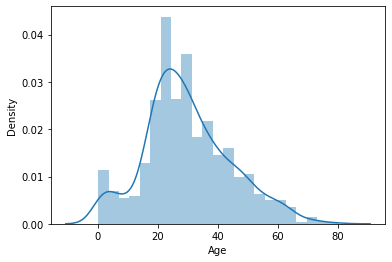

In [7]:
sns.distplot(df["Age"], kde=True)

In [8]:
median_age = round(df['Age'].median())
df['Age'] = df['Age'].fillna(median_age)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

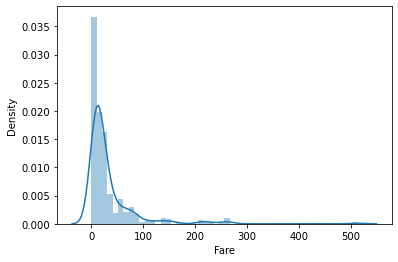

In [9]:
sns.distplot(df['Fare'], kde=True)

In [10]:
median_fare = round(df['Fare'].median())
df['Fare'] = df['Fare'].fillna(median_fare)

In [11]:
df['Embarked'] = df['Embarked'].replace({"Southampton": "S", "Cherbourg": "C", "Queenstown":"Q"})

<AxesSubplot:xlabel='Embarked', ylabel='count'>

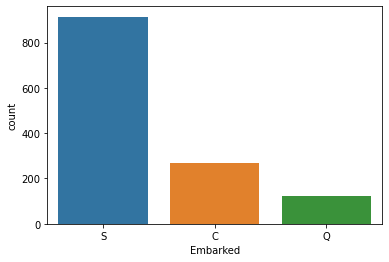

In [12]:
sns.countplot(df['Embarked'])

In [13]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [14]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Emb'])

In [15]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('Life Boat', axis=1, inplace=True)

In [16]:
df['Title'] = df['Name'].apply(lambda x : x.split(", ")[1].split(".")[0])

In [17]:
title = []

for i in df['Title']:
    if i == 'Mr' or i == 'Miss' or i == 'Mrs' or i == 'Master':
        title.append(i)
    else:
        title.append('Others')

df['Title'] = title

In [18]:
Survived = {"Yes" : 0, "No" : 1}
Pclass   = {"First" : 1, "Second" : 2, "Third" : 3}
Sex      = {"Male" : 0, "Female" : 1}
Title    = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Others" : 4}

data = [df]

for dataset in data:
    dataset['Survived'] = dataset['Survived'].map(Survived)
    dataset['Pclass'] = dataset['Pclass'].map(Pclass)
    dataset['Sex'] = dataset['Sex'].map(Sex)
    dataset['Title'] = dataset['Title'].map(Title)

In [19]:
df['Age'] = df['Age'].astype(int)
df['Age']  = round(df['Age'])

df['Fare'] = df['Fare'].astype(int)
df['Fare'] = round(df['Fare'])

# Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

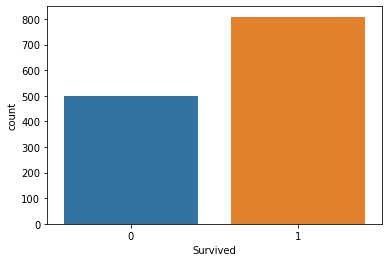

In [20]:
sns.countplot(df['Survived'])

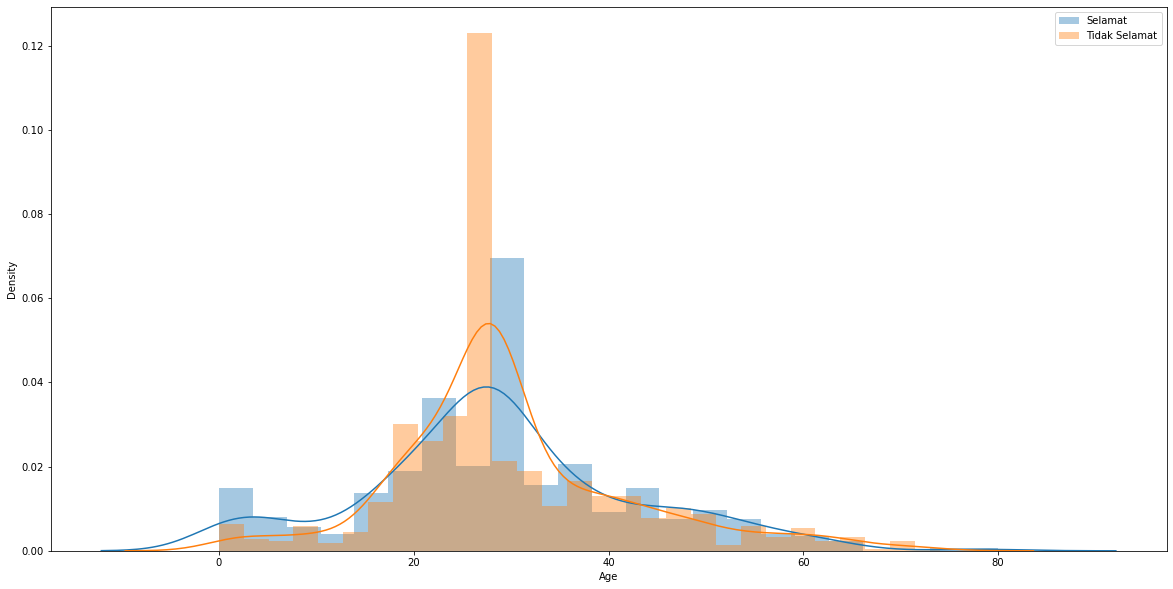

In [21]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==0]['Age'], label='Selamat')
sns.distplot(df[df['Survived']==1]['Age'], label='Tidak Selamat')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

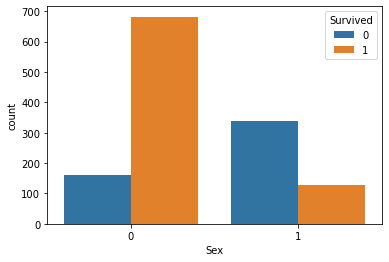

In [22]:
sns.countplot(df['Sex'], hue=df['Survived']) #male 0, female 1, survived 0, not survived 1

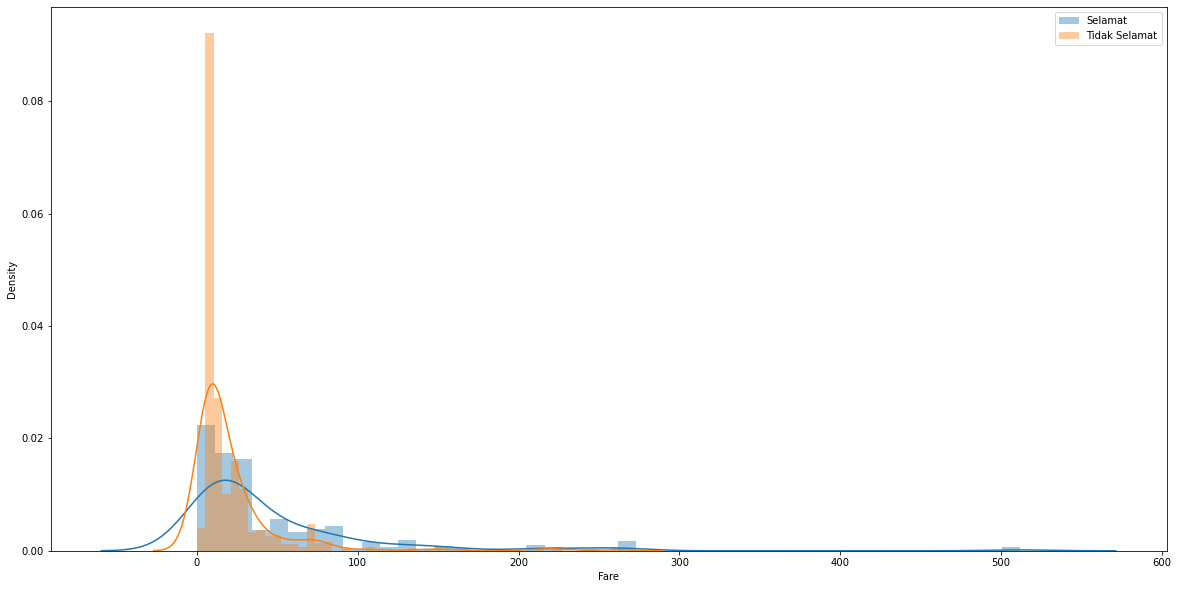

In [23]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['Survived']==0]['Fare'], label='Selamat')
sns.distplot(df[df['Survived']==1]['Fare'], label='Tidak Selamat')
plt.legend()
plt.show()

In [24]:
age = []

for i in df['Age']:
    if i < 15:
        age.append(0)
    elif i >= 15 and i < 65:
        age.append(1)
    elif i >= 65 and i <= 80:
        age.append(2)
        
df['Age'] = age

In [25]:
fare = []

for i in df['Fare']:
    if i < 80:
        fare.append(0)
    elif i >= 80 and i < 160:
        fare.append(1)
    elif i >= 160 and i <=515:
        fare.append(2)

df['Fare'] = fare

In [26]:
df = df.drop(['Name','Ticket'], axis=1)

# Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [28]:
train_var = df.drop(['Survived'], axis=1)
test_var = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1047, 10), (1047,), (262, 10), (262,))

In [29]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

(1. Confusion matrix, 2. Accuracy, 3. Precision, 4. Recall, 5. Specificity, 6. F1 score, 7. Precision-Recall or PR curve, 8. ROC (Receiver Operating Characteristics)

Average cross validation score: 0.789
[[ 68  31]
 [ 11 152]]
accuracy: 0.840
precision: 0.831
recall: 0.933
specificity: 0.687
F1 Score: 0.879
ROC: 0.875


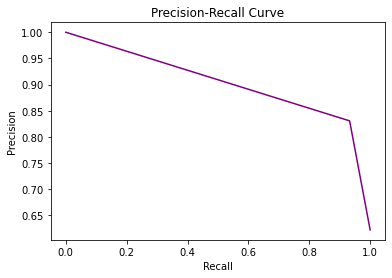

In [30]:
logreg = LogisticRegression(max_iter=500).fit(x_train_std, y_train)
scores = cross_val_score(logreg, x_train_std, y_train, cv=5)
logreg_pred = logreg.predict(x_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, logreg_pred))
print("accuracy: {:.3f}".format(logreg.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, logreg_pred)))
print("recall: {:.3f}".format(recall_score(y_test, logreg_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, logreg_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, logreg_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   

Average cross validation score: 0.777
[[ 59  40]
 [ 18 145]]
accuracy: 0.649
precision: 0.784
recall: 0.890
specificity: 0.596
F1 Score: 0.833
ROC: 0.780


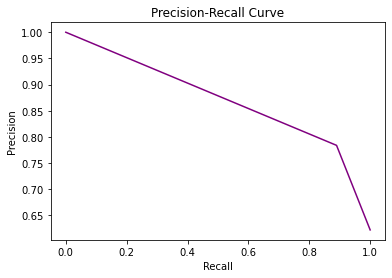

In [31]:
tree = DecisionTreeClassifier().fit(x_train, y_train)
scores = cross_val_score(tree, x_train, y_train, cv=5)
tree_pred = tree.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, tree_pred))
print("accuracy: {:.3f}".format(tree.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, tree_pred)))
print("recall: {:.3f}".format(recall_score(y_test, tree_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, tree_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, tree_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, tree.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, tree_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


Average cross validation score: 0.785
[[ 58  41]
 [ 15 148]]
accuracy: 0.771
precision: 0.783
recall: 0.908
specificity: 0.586
F1 Score: 0.841
ROC: 0.849


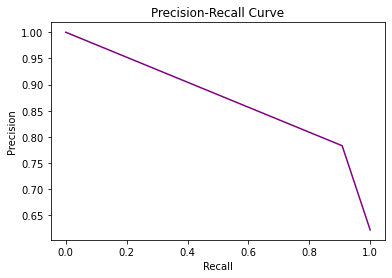

In [32]:
random_forest = RandomForestClassifier().fit(x_train, y_train)
scores = cross_val_score(random_forest, x_train, y_train, cv=5)
rf_pred = random_forest.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, rf_pred))
print("accuracy: {:.3f}".format(random_forest.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, rf_pred)))
print("recall: {:.3f}".format(recall_score(y_test, rf_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, rf_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, random_forest.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, rf_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


Average cross validation score: 0.800
[[ 59  40]
 [ 14 149]]
accuracy: 0.790
precision: 0.788
recall: 0.914
specificity: 0.596
F1 Score: 0.847
ROC: 0.846


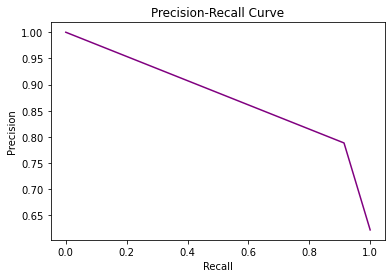

In [33]:
knn = KNeighborsClassifier().fit(x_train, y_train)
scores = cross_val_score(knn, x_train, y_train, cv=5)
knn_pred = knn.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, knn_pred))
print("accuracy: {:.3f}".format(knn.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, knn_pred)))
print("recall: {:.3f}".format(recall_score(y_test, knn_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, knn_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, knn_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


Average cross validation score: 0.811
[[ 58  41]
 [ 15 148]]
accuracy: 0.676
precision: 0.783
recall: 0.908
specificity: 0.586
F1 Score: 0.841
ROC: 0.829


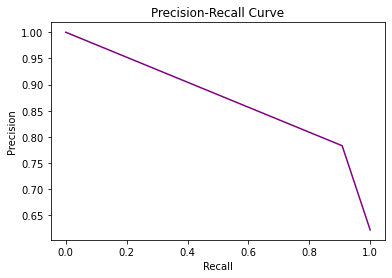

In [34]:
svm = SVC(probability=True).fit(x_train, y_train)
scores = cross_val_score(svm, x_train, y_train, cv=5)
svm_pred = random_forest.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, svm_pred))
print("accuracy: {:.3f}".format(svm.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, svm_pred)))
print("recall: {:.3f}".format(recall_score(y_test, svm_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, svm_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, svm.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, svm_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   
